In [1]:

import os
import sys

sys.path.append(os.getcwd()+"/..")
from importlib import reload

import numpy as np
import matplotlib.pyplot as plt

from PlotSC import PlotSensitivityCurves

from TensorPowerSpec import PowSpecT

from GEFSchwinger.GEFSchwinger import GEF



In [2]:
a = np.arange(0, 100, 10)
b = np.where(a>60)[0]
print(b)

[7 8 9]


In [3]:
#Set coupling Constant
beta=25
MbMexist=True

#Set path to the directory where the GEF results are stored
path = os.getcwd()
name = path+f"/../Out/GEF_Beta{beta}.0_SEmix_KDep_1it.dat"

#Set up initial conditions for the GEF system (I plan to streamline this at some point)
alpha = 0.
Mpl = 1.
M = 6e-6*Mpl
phi0 = 15.55*Mpl
dphidt0 = -np.sqrt(2/3)*M*Mpl
ini = {"phi":phi0, "dphi":dphidt0}
ntr = 150
H = GEF(0, beta, Mpl, ini, M, ntr, SE="mix", AltDamp=2, approx=True)
H.LoadData(name)
Nend = H.EndOfInflation()[0]


[61.01322827]


In [4]:
P = PowSpecT(H)

ks = np.logspace(np.log10(P.mink), np.log10(P.maxk), 50)


[61.01322827]
61.01322827232637


In [ ]:
PT = P.ComputePowSpec(ks, ModePath="../Modes/MbM_Beta25.0+SEmix+KDep1it.dat")

In [6]:
aH = H.vals["a"]*H.vals["H"]
PTAnalytic = P.PTAnalytical()

fs = P.ktofreq(ks)
faH = P.ktofreq(aH)

OmegaGW = P.PTtoOmega(PT["tot"], ks)
OmegaGWAnalytic = P.PTtoOmega(P.PTAnalytical()["tot"], aH)

['LISA', 'EPTA', 'IPTA', 'HLV', 'BBO', 'HLVK', 'HLVO2', 'DECIGO', 'HL', 'NANOGrav', 'SKA', 'CE', 'ET', 'NANOGrav', 'PPTA']


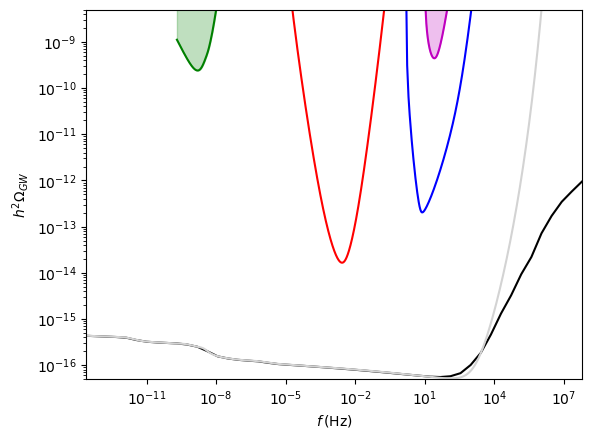

In [9]:

limy = (5e-17, 5e-9)# max(OmegaGW))
limx = (min(fs), max(fs))

fig, ax = plt.subplots(1,1)


ax.plot(faH, OmegaGWAnalytic, "lightgray")
ax.plot(fs, OmegaGW, "k")
PlotSensitivityCurves(ax, ["LISA", "ET", "NANOGrav", "HLVK"], ["r", "b", "g", "m", "y", "c"])
ax.set_xlim(limx)
ax.set_ylim(limy)

ax.set_ylabel("$h^2 \Omega_{GW}$")
ax.set_xlabel(r"$f\,({\rm Hz})$")
ax.set_yscale("log")
ax.set_xscale("log")
plt.savefig(f"../Plots/OmegaGW_beta{beta}_SE.png")
plt.show()